# Input variables:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   #related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# OBJECTIVES 

#To find:

    1) Whether a particular client will subscribe to a term deposit.
    
    2) What are the factors affecting term deposit subscription.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("bank-full - Copy.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Shows no missing values but some features have unknowns which can be treated as missing data points.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

16 features and 1 binary target variable. Can perform binary classification models. Beyond that, can perform USL.

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age to duration: skewness present in all, though more in balance and duration.

campaign: three quarters of the values are less than or equal to the 75th quartile = 3, therefore we can say that most people were contacted at most 3 times during this campaign.

pdays: three quarters of the values are less than or equal to the 75th quartile = -1, therefore we can say that most people were not contacted in the previous campaign.

previous: three quarters of the values are less than or equal to the 75th quartile = 0, therefore we can say that most people were not contacted before the campaign.

In [8]:
df.y.value_counts(normalize = True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Is this an imbalanced data with 88% no and 12% yes values?

In [9]:
df.groupby(['y']).mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


More amount of time was spent on people who subscribed to the term deposit. 

Time gap between last and current contact is on average twice as more for those who subscribed to the TD.

In [10]:
df_C_Cols = df[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']]
df_N_Cols = df[['age','balance', 'day', 'duration', 'campaign', 'pdays','previous']]

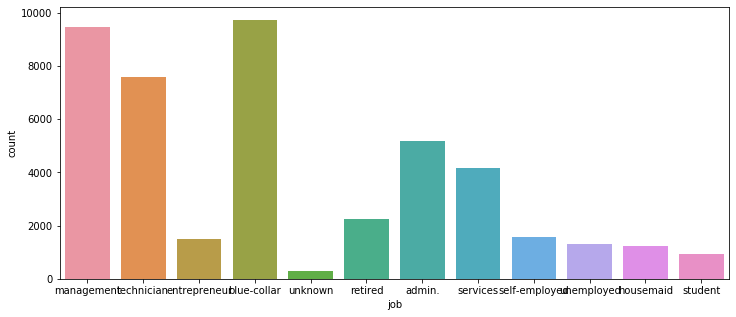

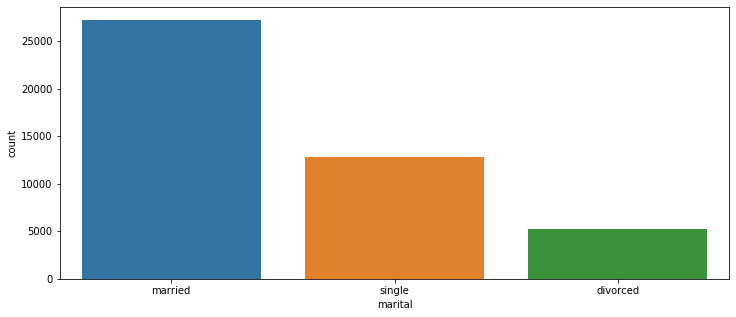

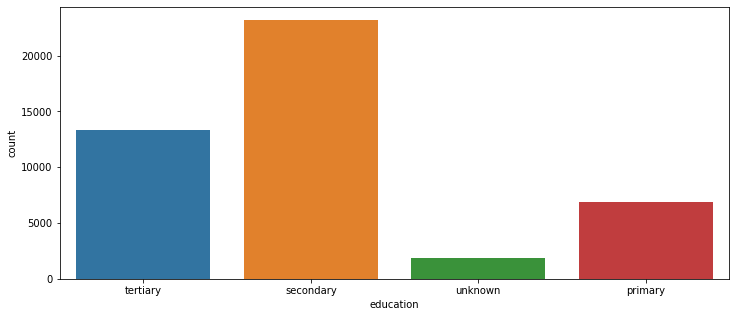

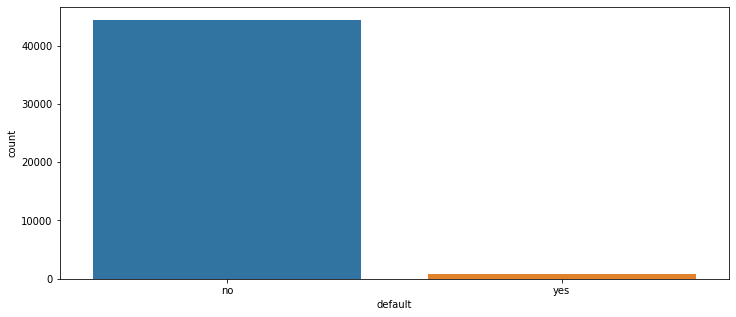

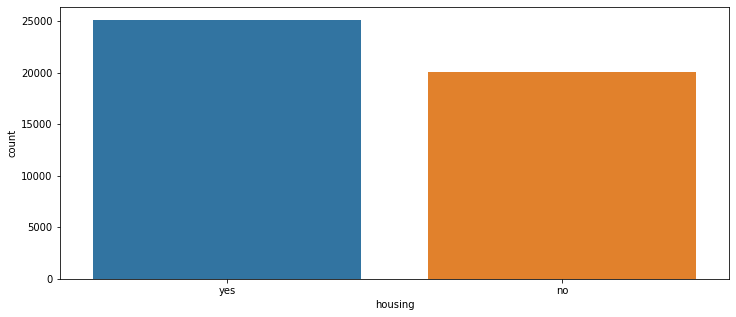

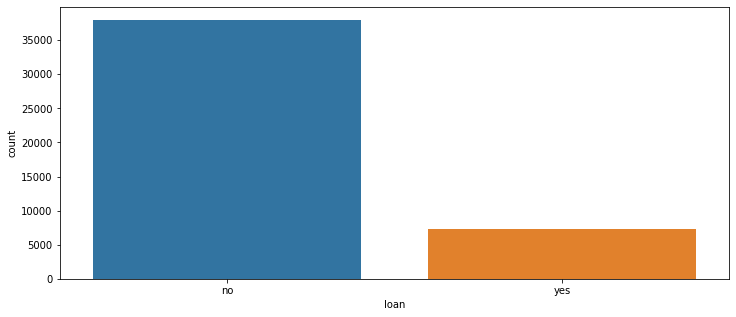

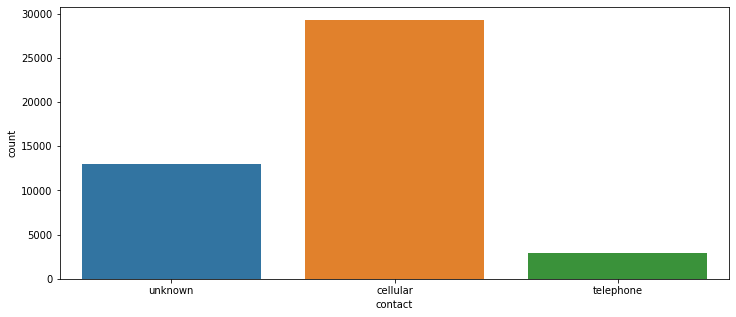

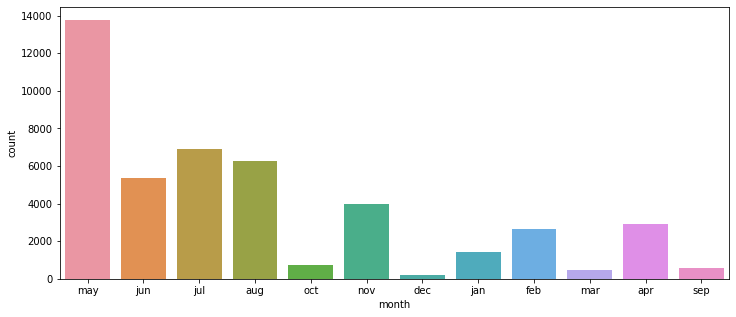

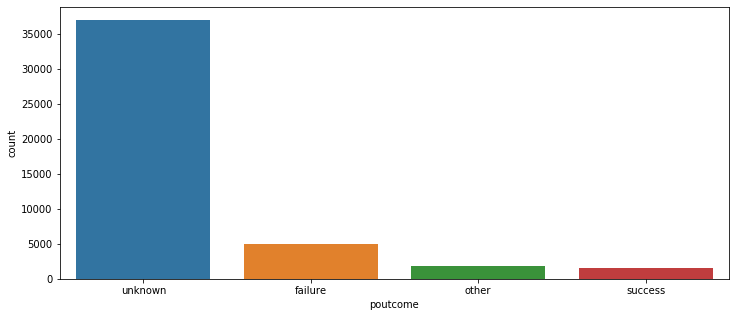

In [17]:
for col in df_C_Cols:
    plt.figure(figsize=(12,5))
    sns.countplot(col, data=df)
    plt.show()
    

More White and Blue Collar Jobs

More Married

More calls made in month of May

Outcome of previous campaign mostly unknown

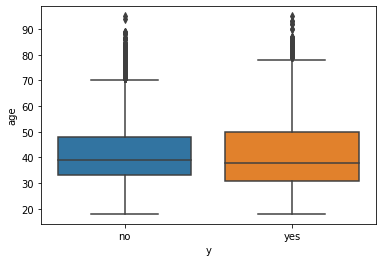

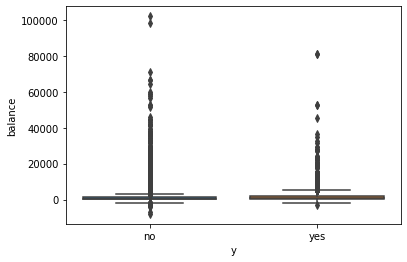

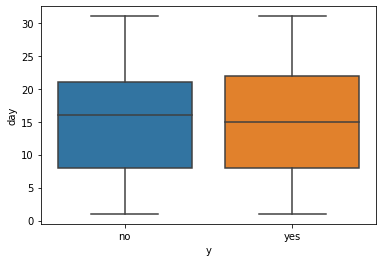

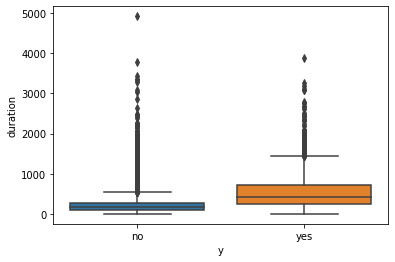

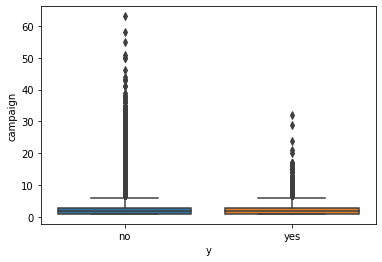

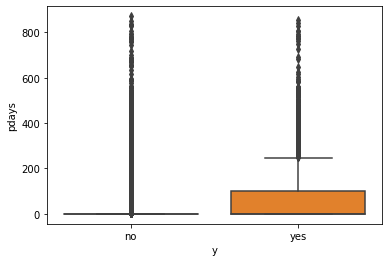

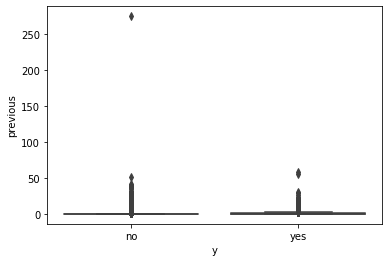

In [12]:
for i in df_N_Cols:
    sns.boxplot(x='y', y=i, data=df)
    plt.show()

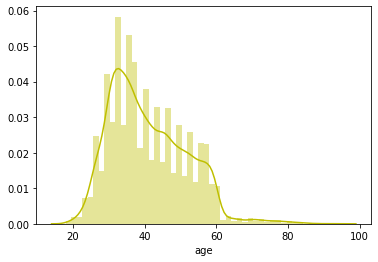

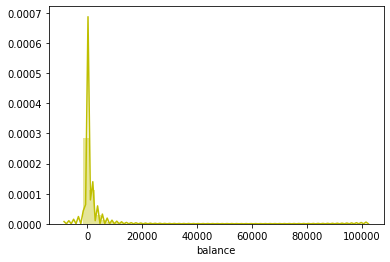

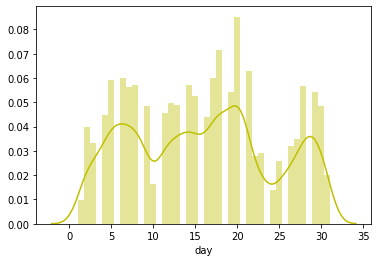

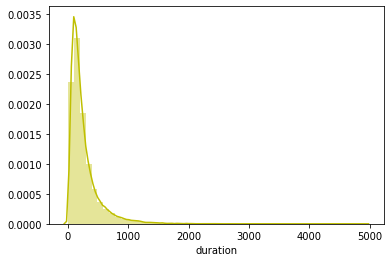

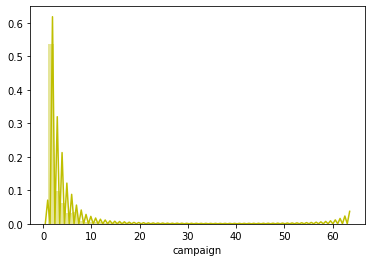

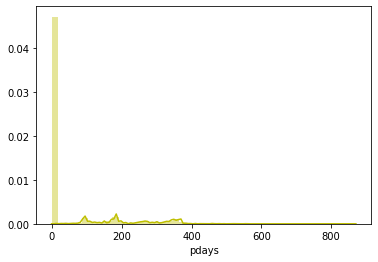

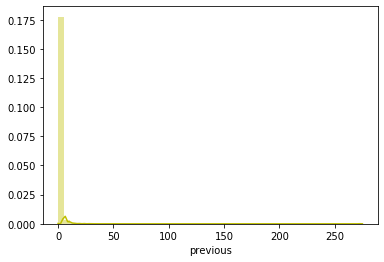

In [19]:
for i in df_N_Cols:
    sns.distplot(df[i], color= 'y')
    plt.show()

In [14]:
cols = df[['job','education', 'contact','poutcome']]
for i in cols:
    print(i.upper())
    print(df[i].value_counts())
    print('\n')

JOB
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


EDUCATION
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


CONTACT
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


POUTCOME
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64




Is Contact an important variable?

Impute job and education. Unknowns are less.

Poutcome has max unknowns